In [3]:
from os.path import join, abspath
from os import getcwd

import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from scipy.spatial.distance import pdist, squareform

from src.data.load_dataset import load_V1_natural_images
from src.models.weights import V1_weights

In [6]:
data_dir = abspath(join(getcwd(), '../../'))

In [103]:
# load V1 RF data from Marius using natural image stimuli
rf_data, snr, dim = load_V1_natural_images(centered=True)
center = (int(dim[0] / 2), int(dim[1] / 2))
rf = rf_data[:, snr > 0.4, :]
num_trials, num_cells, _ = rf.shape
rf = np.mean(rf, axis=0)
rf_norm = (rf - np.mean(rf, axis=1).reshape(-1, 1)) / np.std(rf, axis=1).reshape(-1, 1)

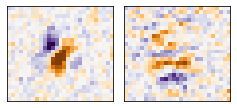

In [214]:
cells= [5642, 3119, 734, 4368, 3332, 1167, 4441, 594, 5203, 739, 2885]
# cells = np.random.randint(0, num_cells, 2) 
# print(cells)
fig = plt.figure(figsize=(4, 2))
for i, cell in enumerate(cells[:2]):
    ax = fig.add_subplot(1, 2, i+1)
    plt.imshow(rf_norm[cell].reshape(dim), cmap='PuOr')
    ax.tick_params(axis='both', which='both', left=False, bottom=False, 
               labelleft=False, labelbottom=False)
    plt.clim(-4, 4)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_4/v1_rf_nat_images.pdf',
            dpi=300, transparent=True, pad_inches = 0)

In [215]:
## generate V1 weights
s, f, c, scale = 5.40, 1.17, center, 1
W = V1_weights(num_cells, dim, s, f, c, scale, seed=20)
W = (W - np.mean(W, axis=1).reshape(-1, 1)) / np.std(W, axis=1).reshape(-1, 1)

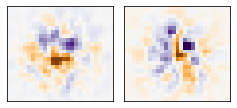

In [259]:
cells = [1642, 6813, 7526, 4334, 8742, 10506, 2640, 2434]
# cells = np.random.randint(0, num_cells, 2)
# print(cells)
fig = plt.figure(figsize=(4, 2))
for i, cell in enumerate(cells[:2]):
    ax = fig.add_subplot(1, 2, i+1)
    plt.imshow(W[cell].reshape(dim), cmap='PuOr')
    ax.tick_params(axis='both', which='both', left=False, bottom=False, 
               labelleft=False, labelbottom=False)
    plt.clim(-5, 5)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_4/generated_rf_nat_images.pdf',
            dpi=300, transparent=False, pad_inches = 0)

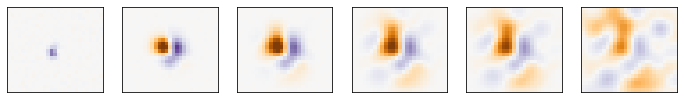

In [301]:
## plot increasing receptive fields; still using the old figs tho
from src.models.estimator import V1_inspired_weights_same_center as V1_weights_estimator
s_list = [1, 2.5, 3.5, 4.8, 5.6, 9.5]
f = 3

fig = plt.figure(figsize=(12, 2))
for i, s in enumerate(s_list):
    ax = fig.add_subplot(1, 6, i+1)
    W = V1_weights_estimator(20, dim, s, f, center, scale=1, random_state=20)
    plt.imshow(W[12].reshape(dim), cmap='PuOr')
    plt.clim(-5, 5)
    ax.tick_params(axis='both', which='both', left=False, bottom=False, 
               labelleft=False, labelbottom=False)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_4/rf_increasing_size_nat_images.pdf',
            dpi=300, transparent=False, pad_inches = 0)

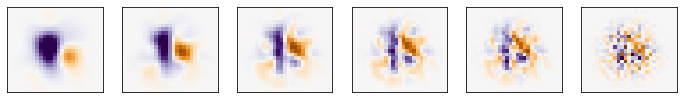

In [302]:
## plot increasing spatial frequency; still using the old figs tho
f_list = [0.5, 1, 1.3, 1.7, 2.5, 3.8]
s = 4

fig = plt.figure(figsize=(12, 2))
for i, f in enumerate(reversed(f_list)):
    ax = fig.add_subplot(1, 6, i+1)
    W = V1_weights_estimator(20, dim, s, f, center, scale=1, random_state=22)
    plt.imshow(W[2].reshape(dim), cmap='PuOr')
    plt.clim(-5, 5)
    ax.tick_params(axis='both', which='both', left=False, bottom=False, 
               labelleft=False, labelbottom=False)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_4/rf_increasing_frequency_nat_images.pdf',
            dpi=300, transparent=False, pad_inches = 0)